# Student Loan Risk with Deep Learning
### Author: Saikumar Kalyankrishnan

In [1294]:
import keras
# Imports
import pandas as pd
from pathlib import Path
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

---

## Prepare the data to be used on a neural network model

### Step 1: Read the `student_loans.csv` file into a Pandas DataFrame. Review the DataFrame, looking for columns that could eventually define your features and target variables.   

In [1295]:
# Read the csv into a Pandas DataFrame
file_path = "http://static.bc-edx.com/mbc/ai/m6/datasets/student_loans.csv"

# Read the data into a DataFrame
df = pd.read_csv(file_path)

# Review the DataFrame
df.head()

,payment_history,location_parameter,stem_degree_score,gpa_ranking,alumni_success,study_major_code,time_to_completion,finance_workshop_score,cohort_ranking,total_loan_score,financial_aid_score,credit_ranking
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [1296]:
# Review the data types associated with the columns
df.dtypes

payment_history           float64
location_parameter        float64
stem_degree_score         float64
gpa_ranking               float64
alumni_success            float64
study_major_code          float64
time_to_completion        float64
finance_workshop_score    float64
cohort_ranking            float64
total_loan_score          float64
financial_aid_score       float64
credit_ranking              int64
dtype: object

### Step 2: Using the preprocessed data, create the features (`X`) and target (`y`) datasets. The target dataset should be defined by the preprocessed DataFrame column “credit_ranking”. The remaining columns should define the features dataset.

In [1297]:
# Define the target set y using the credit_ranking column
y = df['credit_ranking'].values
counts = df['credit_ranking'].value_counts()
print(counts)

# Display a sample of y
y

credit_ranking
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64


array([5, 5, 5, ..., 6, 5, 6])

In [1298]:
# Define features set X by selecting all columns but credit_ranking
X = df.drop(columns=['credit_ranking']).values

# Review the features DataFrame
X

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

### Step 3: Split the features and target sets into training and testing datasets.


In [1299]:
# Split the preprocessed data into a training and testing dataset
# Assign the function a random_state equal to 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Step 4: Use scikit-learn's `StandardScaler` to scale the features data.

In [1300]:
# Create a StandardScaler instance
X_scaler = StandardScaler()

# Fit the scaler to the features training dataset
X_scaler.fit(X_train)

# Fit the scaler to the features training dataset
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

---

## Compile and Evaluate a Model Using a Neural Network

### Step 1: Create a deep neural network by assigning the number of input features, the number of layers, and the number of neurons on each layer using Tensorflow’s Keras.


In [1301]:
# Define the number of inputs (features) to the model
number_input_features = 11

# Review the number of features
number_input_features

11

In [1302]:
# Define the number of neurons in the output layer
number_output = 1
number_output

1

In [1303]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1 = 8

# Review the number hidden nodes in the first layer
hidden_nodes_layer1

8

In [1304]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2 = 5

# Review the number hidden nodes in the second layer
hidden_nodes_layer2

5

In [1305]:
from keras.models import Sequential
from keras.layers import Dense

# Create the Sequential model instance
nn = Sequential()

# Add the Input layer
nn.add(keras.Input(shape=(number_input_features,)))

In [1306]:
# Add the first hidden layer
nn.add(Dense(units=hidden_nodes_layer1, activation="relu"))


In [1307]:
# Add the second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))

In [1308]:
# Add the output layer to the model specifying the number of output neurons and activation function
nn.add(Dense(units=number_output, activation="linear"))

In [1309]:
# Display the Sequential model summary
nn.summary()

Model: "sequential_53"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ dense_157 (Dense)               │ (None, 8)                 │         96 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_158 (Dense)               │ (None, 5)                 │         45 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_159 (Dense)               │ (None, 1)                 │          6 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 147 (588.00 B)

 Trainable params: 147 (588.00 B)

 Non-trainable params: 0 (0.00 B)

### Step 2: Compile and fit the model using the `mse` loss function, the `adam` optimizer, and the `mse` evaluation metric.


In [1310]:
# Compile the Sequential model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

In [1311]:
# Fit the model using 50 epochs and the training data
deep_net_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 32.0950 - mse: 32.0950
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 27.9507 - mse: 27.9507
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23.3625 - mse: 23.3625 
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18.1482 - mse: 18.1482
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13.1420 - mse: 13.1420 
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.2928 - mse: 9.2928
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.9717 - mse: 6.9717
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.1908 - mse: 5.1908
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1481 - mse: 4.1481
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.4554 - mse: 3.4554
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.9857 - mse: 2.9857
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7246 - mse: 2.7246
Epoch 13/100
38/38 ━━━━━━

### Visualizing the Model's Performance

<Axes: >

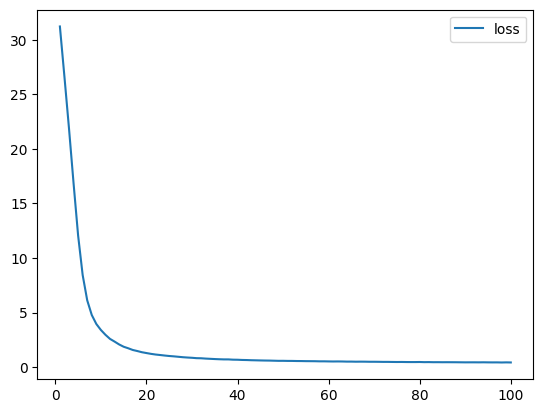

In [1312]:
# Create a DataFrame with the history dictionary
df = pd.DataFrame(deep_net_model.history, index=range(1, len(deep_net_model.history["loss"]) + 1))

# Plot the loss
df.plot(y="loss")

### Step 3: Evaluate the model using the test data to determine the model’s loss and accuracy.


In [1313]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_mse = nn.evaluate(X_test_scaled, y_test, verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, MSE: {model_mse}")

13/13 - 0s - 10ms/step - loss: 0.4631 - mse: 0.4631
Loss: 0.46311765909194946, MSE: 0.46311765909194946


### Step 4: Save and export your model to an HDF5 file, and name the file `student_loans.h5`.


In [1314]:
# Set the model's file path
file_path = Path("saved_models/student_loans.h5")

# Export your model to a HDF5 file
nn.save(file_path)

/Users/sychedelic3/PycharmProjects/cu-aiml/venv/lib/python3.11/site-packages/keras/src/models/model.py:342: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  warnings.warn(


---
## Predict Loan Repayment Success by Using your Neural Network Model

### Step 1: Reload your saved model.

In [1315]:
from keras.models import load_model

# Set the model's file path
file_path = Path("saved_models/student_loans.h5")

# Load the model to a new object
nn_imported = load_model(file_path)

### Step 2: Make predictions on the testing data.

In [1316]:
# Make predictions on the testing data
model_loss, model_mse = nn_imported.evaluate(X_test_scaled, y_test, verbose=2)

# Display evaluation results
print(f"Loss: {model_loss}, MSE: {model_mse}")

13/13 - 0s - 11ms/step - loss: 0.4631 - mean_squared_error: 0.4631
Loss: 0.46311765909194946, MSE: 0.46311765909194946


### Step 3: Create a DataFrame to compare the predictions with the actual values.

In [1317]:
# Make predictions on test data
predictions = nn_imported.predict(X_test_scaled).round().astype("int32")

# Create a DataFrame to compare the predictions with the actual values
results = pd.DataFrame({"predictions": predictions.ravel(), "actual": y_test})

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


### Step 4: Display a sample of the DataFrame you created in step 3.

In [1318]:
# Display sample data
results.head(10)


,predictions,actual
0,5,5
1,5,6
2,6,6
3,5,6
4,7,6
5,6,6
6,6,6
7,5,5
8,6,5
9,5,5
